# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Win...
1,✅ Trip Verified | 4 Hours before takeoff we r...
2,✅ Trip Verified | I recently had a delay on B...
3,"Not Verified | Boarded on time, but it took a..."
4,"✅ Trip Verified | 5 days before the flight, w..."


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

### Removing unnecessary strings

In [5]:
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified | ", "", regex=False)
df['reviews'] = df['reviews'].str.replace("Not Verified | ", "", regex=False)

df.head()

,reviews
0,Quick bag drop at First Wing but too many pas...
1,4 Hours before takeoff we received a Mail sta...
2,I recently had a delay on British Airways fro...
3,"Boarded on time, but it took ages to get to t..."
4,"5 days before the flight, we were advised by ..."


# Data Analysis

### Wordcloud

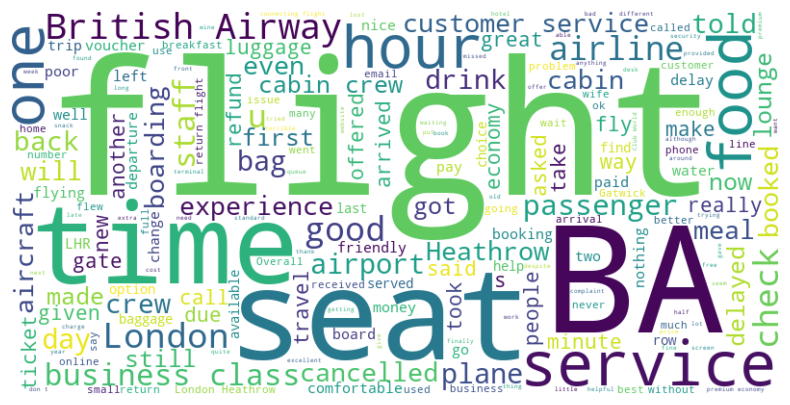

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews_text = ' '.join(df['reviews'].astype(str))

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
import sys
print(sys.executable)

C:\Users\ilham\AppData\Local\Programs\Python\Python311\python.exe


### Sentiment Analysis

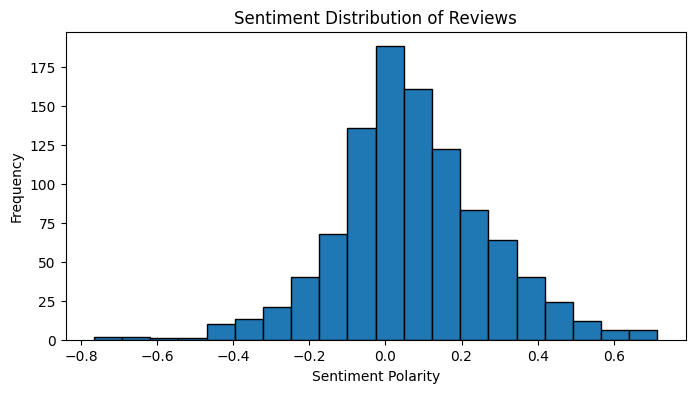

In [9]:
from textblob import TextBlob  # For sentiment analysis

df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 4))
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()